In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from pytweezer.beams import Gaussian
from pytweezer.t_matrix import TMatrixMie
from pytweezer import force_torque, find_equilibrium

In [3]:
n_medium = 1.33
n_particle = 1.59
wavelength0 = 1064e-9
wavelength_medium = wavelength0/n_medium
radius = 1.0*wavelength_medium
beam_type = 'gaussian'
NA = 1.02

In [13]:
mat_data = loadmat('../data/simul.mat')
mat_r = mat_data['r']
mat_z = mat_data['z']
mat_fr = mat_data['fr']
mat_fz = mat_data['fz']

In [10]:
T = TMatrixMie(radius=radius, lambda_0=wavelength0, index_m=n_medium, index_p=n_particle)
beam = Gaussian(power=1.0, na=NA, polarization=np.array([1, 1j]), index_m=n_medium, lambda_0=wavelength0)

In [11]:
z = np.array([[0],[0],[1]])*np.linspace(-8,8,200)*wavelength_medium
f = force_torque(beam, T, position=z)
zeq = find_equilibrium(z[2,:], f[2, 0, :])[0].real
r = np.array([[1],[0],[0]])*np.linspace(-4,4,200)*wavelength_medium + np.array([[0],[0],[zeq]])
fr = force_torque(beam, T, position=r)

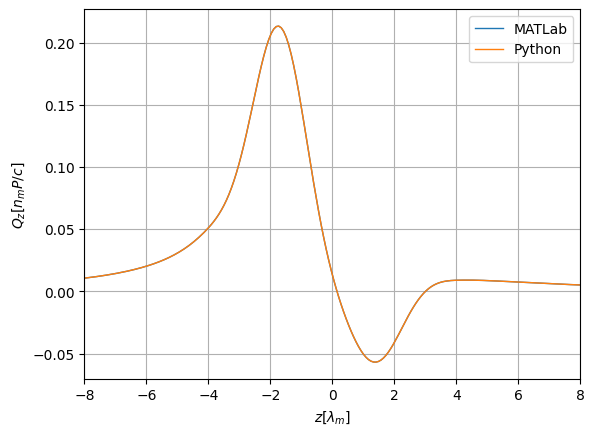

In [33]:
plt.plot(z[2,:]/wavelength_medium, mat_fz[2,:], linewidth=1)
plt.plot(z[2,:]/wavelength_medium, f[2,0,:], linewidth=1)
plt.xlabel(r'$z [\lambda_m]$');
plt.ylabel(r'$Q_z[n_m P / c]$');
plt.legend(['MATLab', 'Python'])
plt.xlim([-8, 8])
plt.grid()
plt.show()

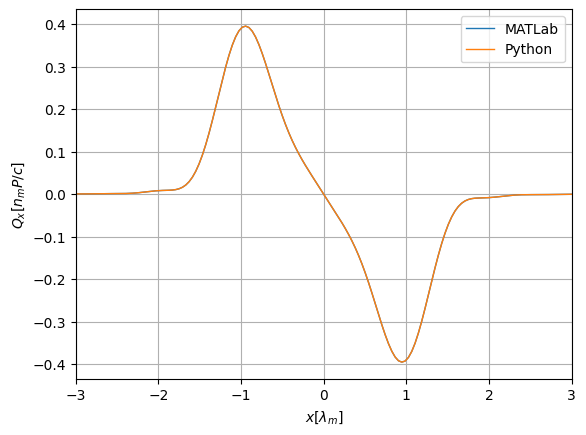

In [38]:
plt.plot(r[0,:]/wavelength_medium, mat_fr[0,:], linewidth=1)
plt.plot(r[0,:]/wavelength_medium, fr[0,0,:], linewidth=1)
plt.xlabel(r'$x [\lambda_m]$');
plt.ylabel(r'$Q_x[n_m P / c]$');
plt.legend(['MATLab', 'Python'])
plt.xlim([-3, 3])
plt.grid()
plt.show()

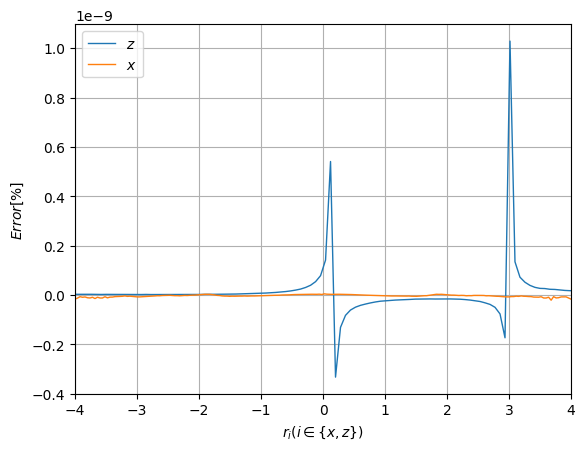

In [58]:
plt.plot(z[2,:]/wavelength_medium, 100*(mat_fz[2,:]-f[2,0,:])/mat_fz[2,:], linewidth=1)
plt.plot(r[0,:]/wavelength_medium, 100*(mat_fr[0,:]-fr[0,0,:])/mat_fr[0,:], linewidth=1)
#plt.plot(z[2,:]/wavelength_medium, f[2,0,:], linewidth=1)
#plt.plot(r[1,:]/wavelength_medium, fr[0,1,:], linewidth=1)
plt.xlabel(r'$r_i (i\in\{x,z\})$');
plt.ylabel(r'$Error[\%]$');
plt.legend([r'$z$', r'$x$'])
plt.xlim([-4, 4])
plt.grid()
plt.show()

In [59]:
np.abs(100*(mat_fz[2,:]-f[2,0,:])/mat_fz[2,:]).mean(), np.abs(100*(mat_fr[0,:]-fr[0,0,:])/mat_fr[0,:]).mean()

(2.399244312272125e-11, 4.423107741016441e-12)